In [6]:
import os
import csv
import os.path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter

data = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/ML Case Study/StudentsPerformance.csv")
data.head(20)
data.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.shape
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.rename(columns={'race/ethnicity': 'ethnicity', 'parental level of education': 'parent_education','test preparation course':'test_prep_course',
                         'math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [10]:
data.columns

Index(['gender', 'ethnicity', 'parent_education', 'lunch', 'test_prep_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [11]:
data.nunique()

gender               2
ethnicity            5
parent_education     6
lunch                2
test_prep_course     2
math_score          81
reading_score       72
writing_score       77
dtype: int64

In [12]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
data['test_prep_course'].unique()

array(['none', 'completed'], dtype=object)

In [14]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
data.isnull().sum()

gender              0
ethnicity           0
parent_education    0
lunch               0
test_prep_course    0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [16]:
correlation = data.corr()

<AxesSubplot:>

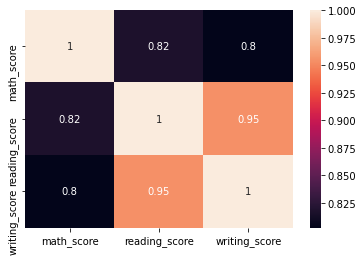

In [17]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

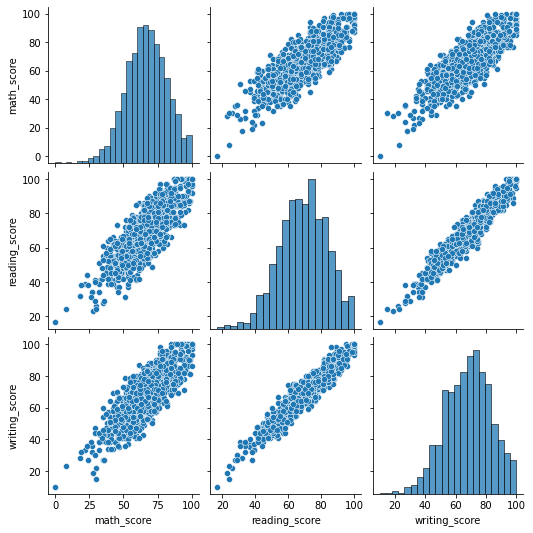

In [18]:
sns.pairplot(data)

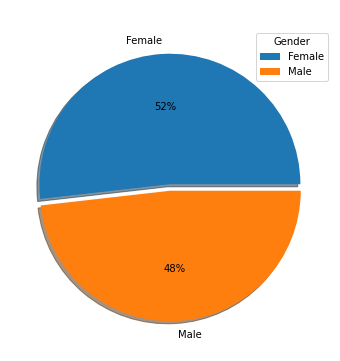

In [41]:
num=data["gender"].value_counts()
plt.figure(figsize=(10,6))
mylabels=["Female","Male"]
myexplode = [0.05, 0]
plt.title("COUNT OF GENDER",fontsize=20, color='w')
plt.pie(num,labels=mylabels,autopct='%1.0f%%', explode = myexplode, shadow = True)
plt.legend(title="Gender")
plt.show()

C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



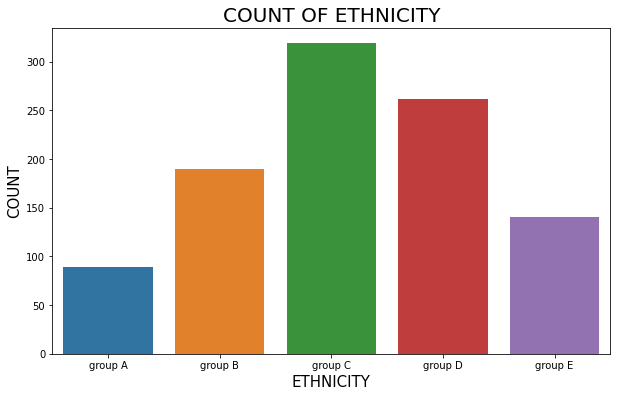

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(sorted(data["ethnicity"]))
plt.title("COUNT OF ETHNICITY",fontsize=20)
plt.xlabel("ETHNICITY",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

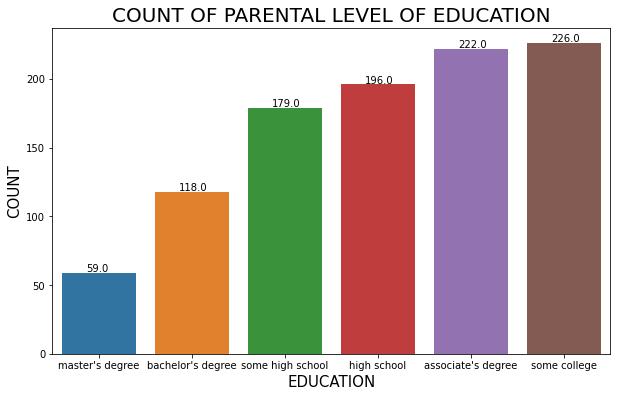

In [132]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'parent_education',
              data = data,
              order = data['parent_education'].value_counts(ascending=True).index)
for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.26, p.get_height()+1))
#for p in ax.patches:
    #ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.6, p.get_height()+10), ha='center', va='top', color='white', size=18)
plt.title("COUNT OF PARENTAL LEVEL OF EDUCATION",fontsize=20)
plt.xlabel("EDUCATION",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   ethnicity         1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep_course  1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


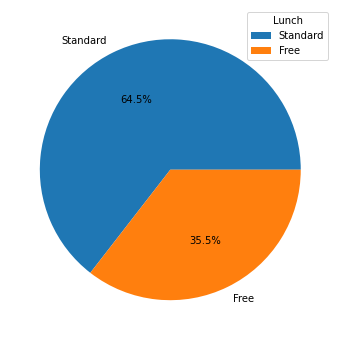

In [139]:
plt.figure(figsize=(10,6))

num=data["lunch"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(num,labels=["Standard","Free"],autopct='%1.1f%%')
plt.legend(title='Lunch')
plt.show()

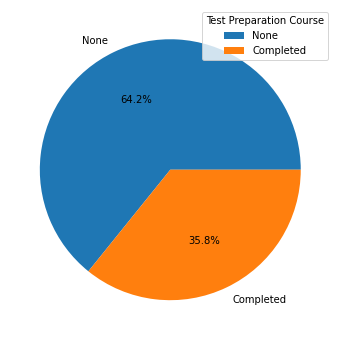

In [147]:
num=data["test_prep_course"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(num,labels=["None","Completed"],autopct='%1.1f%%')
plt.legend(title='Test Preparation Course')
plt.show()

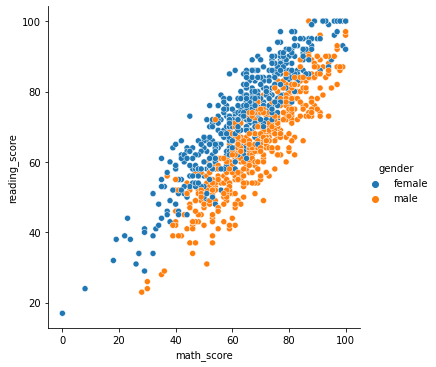

In [19]:
sns.relplot(x='math_score', y='reading_score', hue='gender', data=data)

<AxesSubplot:xlabel='math_score', ylabel='writing_score'>

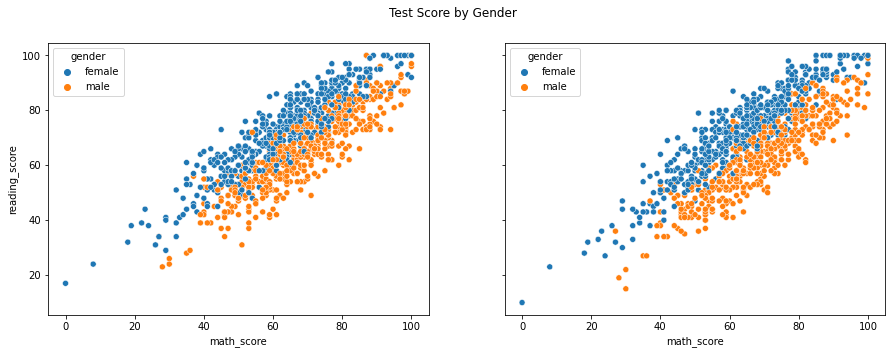

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Test Score by Gender')

sns.scatterplot(ax=axes[0], x='math_score', y='reading_score', hue='gender', data=data)
sns.scatterplot(ax=axes[1], x='math_score', y='writing_score', hue='gender', data=data)

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

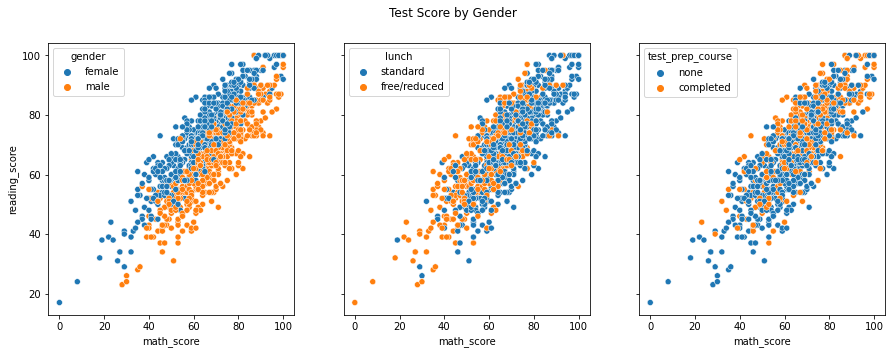

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Test Score by Gender')

sns.scatterplot(ax=axes[0], x='math_score', y='reading_score', hue='gender', data=data)
sns.scatterplot(ax=axes[1], x='math_score', y='reading_score', hue='lunch', data=data)
sns.scatterplot(ax=axes[2], x='math_score', y='reading_score', hue='test_prep_course', data=data)

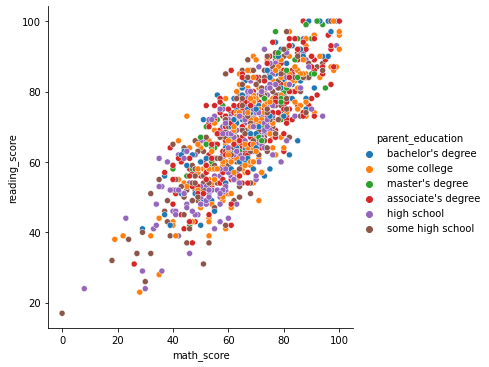

In [22]:
sns.relplot(x='math_score', y='reading_score', hue='parent_education', data=data)

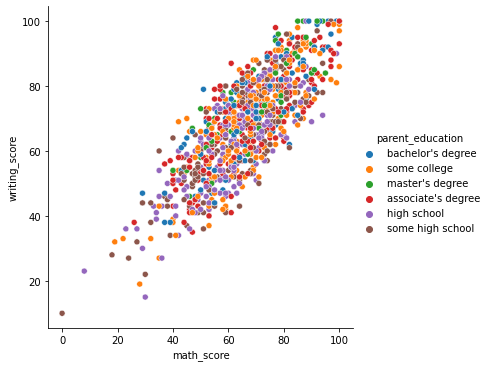

In [23]:
sns.relplot(x='math_score', y='writing_score', hue='parent_education', data=data)

C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='writing_score', ylabel='Density'>

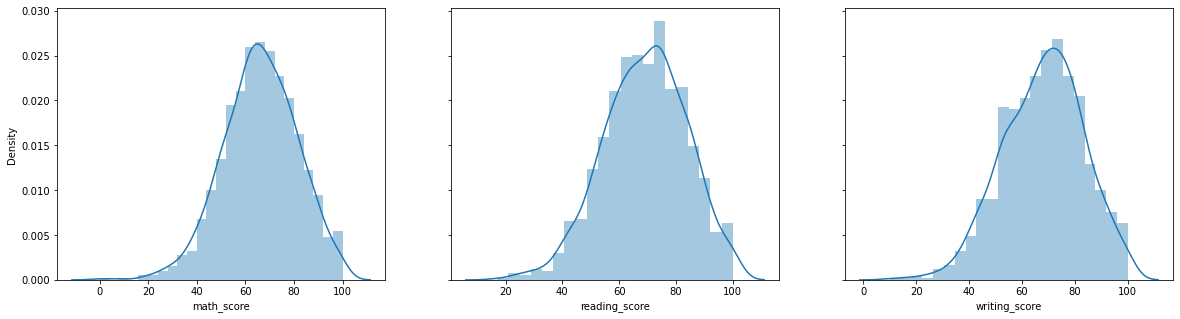

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.distplot(data['math_score'], ax=axes[0])
sns.distplot(data['reading_score'], ax=axes[1])
sns.distplot(data['writing_score'], ax=axes[2])

<AxesSubplot:xlabel='writing_score'>

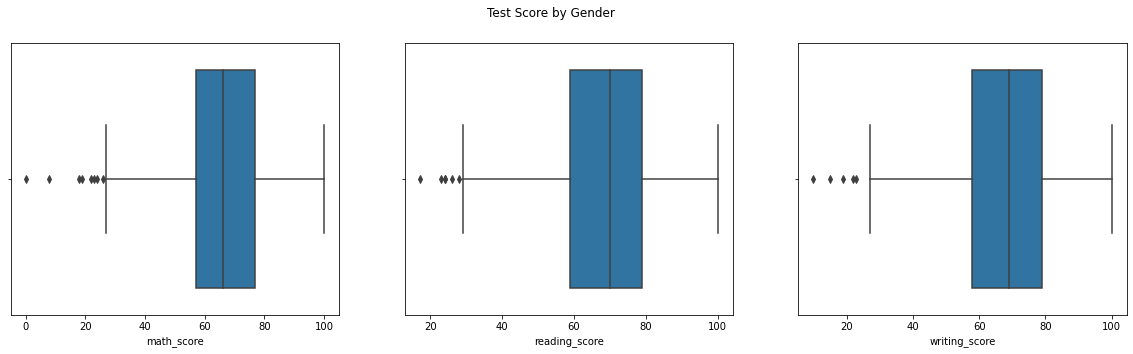

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Test Score by Gender')

sns.boxplot(ax=axes[0], x='math_score', data= data)
sns.boxplot(ax=axes[1], x='reading_score', data= data)
sns.boxplot(ax=axes[2], x='writing_score', data= data)

In [167]:
fig1 = data.groupby('lunch').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig1, barmode='group',title = "<b>Chart Showing Relationship Between Lunch and Scores</b>")


In [26]:
fig1 = data.groupby('parent_education').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig1, barmode='group',title = "<b>Chart Showing Relationship Between Lunch and Scores</b>")

In [209]:
par_meal = data.groupby(['parent_education','lunch']).size().reset_index().rename(columns={0:'count'})
par_meal.head(10)

fig = px.bar(par_meal, x="parent_education", y="count", color="lunch", title="Long-Form Input")
fig.show()
#ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [213]:
fig = px.bar(par_meal, x="parent_education", y="count",
             color='lunch', barmode='group',
             height=400)
fig.show()

In [190]:
fig2 = data.groupby('test_prep_course').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig2, barmode='group',title = "<b>Chart Showing Relationship Between Test Preparation and Scores</b>")

In [215]:
fig3 = data.groupby('gender').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig3, barmode='group',title = "<b>Chart Showing Relationship Between Gender and Scores</b>")